In [1]:
import pandas as pd
pd.__version__

'2.2.2'

In [2]:
from sklearn.decomposition import PCA # import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
data_no_act_test = pd.read_csv('diabetes_NoActivity_test.csv')
data_no_act_train = pd.read_csv('diabetes_NoActivity_training.csv')
data_act_test = pd.read_csv('diabetes_PhysActivity_test.csv')
data_act_train = pd.read_csv('diabetes_PhysActivity_training.csv')

In [4]:
print(data_no_act_test.shape)
print(data_no_act_train.shape)
print(data_act_test.shape)
print(data_act_train.shape)

(300, 8)
(700, 8)
(300, 8)
(700, 8)


In [6]:
# 7 features of No Activity Test + Label
data_no_act_test_features = data_no_act_test.iloc[:, 1:7]
label_no_act_test = data_no_act_test.iloc[:, 0:1]

# 7 features of No Activity Training + Label
data_no_act_train_features = data_no_act_train.iloc[:, 1:7]
label_no_act_train = data_no_act_train.iloc[:, 0:1]

# 7 features of Activity Test + Label
data_act_test_features = data_act_test.iloc[:, 1:7]
label_act_test = data_act_test.iloc[:, 0:1]

# 7 features of Activity Training + Label
data_act_train_features = data_act_train.iloc[:, 1:7]
label_act_train = data_act_train.iloc[:, 0:1]

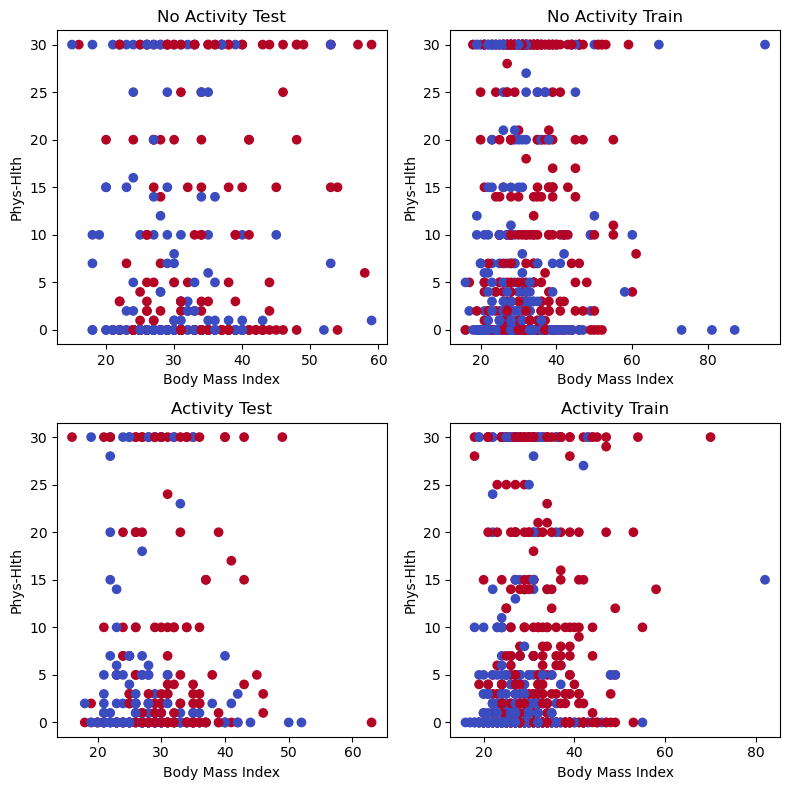

In [7]:
# Choosing column 1 & 4 which are BMI (Body Mass Index) & (Phys-Hlth)
# X-Axis is the First chosen Feature which is (Body Mass Index)
# Y-Axis is the Second chosen Feature which is (Phys-Hlth)

# Now, creating figure and the sub-plot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#################################################### Dataset 1: No Activity Test
axs[0, 0].scatter(data_no_act_test_features.iloc[:, 0],
                  data_no_act_test_features.iloc[:, 3],
                  c=label_no_act_test.values.flatten(), cmap='coolwarm', label='Class')
axs[0, 0].set_title('No Activity Test')
axs[0, 0].set_xlabel('Body Mass Index')
axs[0, 0].set_ylabel('Phys-Hlth')

#################################################### Dataset 2: No Activity Train
axs[0, 1].scatter(data_no_act_train_features.iloc[:, 0],
                  data_no_act_train_features.iloc[:, 3],
                  c=label_no_act_train.values.flatten(), cmap='coolwarm', label='Class')
axs[0, 1].set_title('No Activity Train')
axs[0, 1].set_xlabel('Body Mass Index')
axs[0, 1].set_ylabel('Phys-Hlth')

###################################################### Dataset 3: Activity Test
axs[1, 0].scatter(data_act_test_features.iloc[:, 0],
                  data_act_test_features.iloc[:, 3],
                  c=label_act_test.values.flatten(), cmap='coolwarm', label='Class')
axs[1, 0].set_title('Activity Test')
axs[1, 0].set_xlabel('Body Mass Index')
axs[1, 0].set_ylabel('Phys-Hlth')

##################################################### Dataset 4: Activity Train
axs[1, 1].scatter(data_act_train_features.iloc[:, 0],
                  data_act_train_features.iloc[:, 3],
                  c=label_act_train.values.flatten(), cmap='coolwarm', label='Class')
axs[1, 1].set_title('Activity Train')
axs[1, 1].set_xlabel('Body Mass Index')
axs[1, 1].set_ylabel('Phys-Hlth')

# Adjusting layout
plt.tight_layout()
plt.show()

In [8]:
##################################################### No Activity Group

#------------ StandardScaler for No Activity Test
scaler_no_act_test = StandardScaler()
data_no_act_test_features_scaled = scaler_no_act_test.fit_transform(data_no_act_test_features)

#------------ StandardScaler for No Activity Training
scaler_no_act_train = StandardScaler()
data_no_act_train_features_scaled = scaler_no_act_train.fit_transform(data_no_act_train_features)

###################################################### Activity Group 

#------------ StandardScaler for Activity Test
scaler_act_test = StandardScaler()
data_act_test_features_scaled = scaler_act_test.fit_transform(data_act_test_features)

#------------ StandardScaler for Activity Training
scaler_act_train = StandardScaler()
data_act_train_features_scaled = scaler_act_train.fit_transform(data_act_train_features)

In [9]:
# In the task we have been asked to report the Mean & Standard Deviation 
# for the first feature in the normalised ******Test Set******

#------------------------------------------- No Activity Test Set - First Feature
mean_no_act_test = np.mean(data_no_act_test_features_scaled[:, 0])
std_no_act_test = np.std(data_no_act_test_features_scaled[:, 0])

#------------------------------------------- Physical Activity Test Set - First Feature
mean_act_test = np.mean(data_act_test_features_scaled[:, 0])
std_act_test = np.std(data_act_test_features_scaled[:, 0])

print("No Activity Test Set - Feature 1:")
print("Mean: ", mean_no_act_test) 
print("Standard Deviation: ", std_no_act_test)

print("")

print("Physical Activity Test Set - Feature 1:")
print("Mean: ", mean_act_test) 
print("Standard Deviation: ", std_act_test)

No Activity Test Set - Feature 1:
Mean:  1.2434497875801754e-16
Standard Deviation:  0.9999999999999998

Physical Activity Test Set - Feature 1:
Mean:  -2.042810365310288e-16
Standard Deviation:  1.0


In [10]:
# Now we have been tasked to perform PCA on each **** Scaled Training Set****

########################################################## No Activity Training Set 
pca_no_act = PCA()
pca_no_act_components = pca_no_act.fit_transform(data_no_act_train_features_scaled)
explained_variance_no_act = pca_no_act.explained_variance_ratio_
print("No Activity Training Set Variance Explained:")
print(explained_variance_no_act)
print("Explained Variance: %", explained_variance_no_act*100)
print("")
########################################################## Physical Activity Training Set 
pca_act = PCA()
pca_act_components = pca_act.fit_transform(data_act_train_features_scaled)
explained_variance_act = pca_act.explained_variance_ratio_
print("Physical Activity Training Set Variance Explained:")
print(explained_variance_act)
print("Explained Variance: %", explained_variance_act*100)

No Activity Training Set Variance Explained:
[0.32450026 0.19261856 0.16560488 0.14956364 0.10351546 0.0641972 ]
Explained Variance: % [32.45002569 19.26185648 16.56048762 14.9563643  10.35154588  6.41972002]

Physical Activity Training Set Variance Explained:
[0.3249838  0.18577499 0.16203677 0.15456839 0.10090694 0.07172911]
Explained Variance: % [32.49837972 18.57749939 16.20367659 15.45683908 10.09069439  7.17291084]


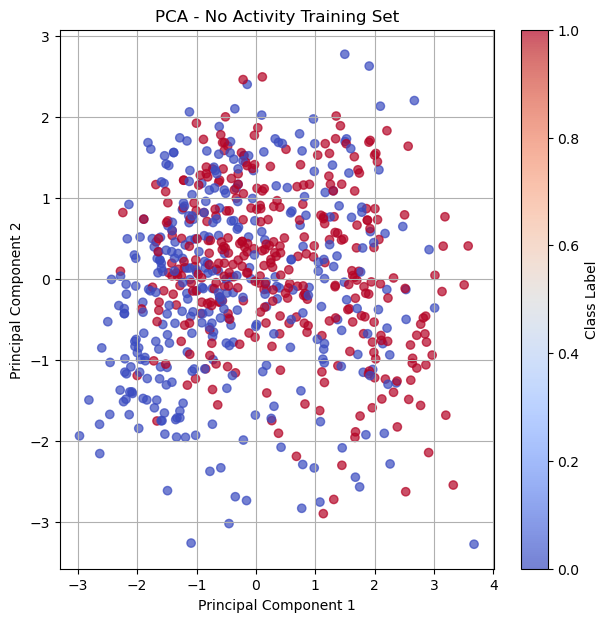

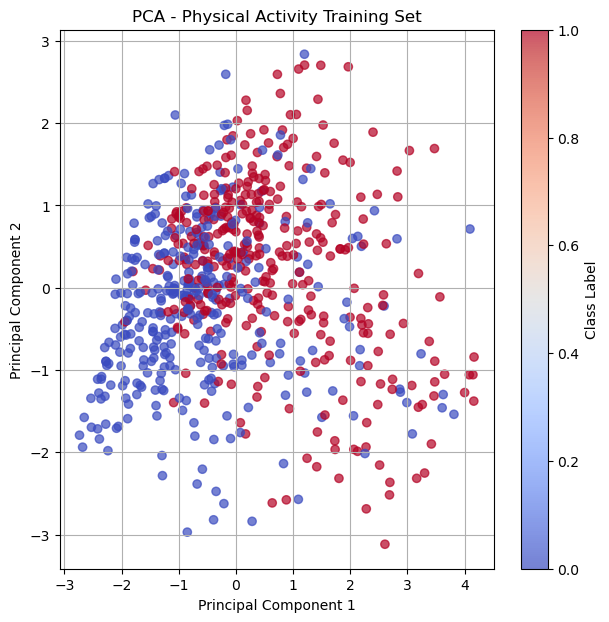

In [15]:
############################################## Plot for No Activity Training Set 
plt.figure(figsize=(7,7))
plt.scatter(pca_no_act_components[:, 0], pca_no_act_components[:, 1], 
            c=label_no_act_train.values.flatten(), cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - No Activity Training Set')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()

############################################# Plot for Physical Activity Training Set 
plt.figure(figsize=(7,7))
plt.scatter(pca_act_components[:, 0], pca_act_components[:, 1], 
            c=label_act_train.values.flatten(), cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Physical Activity Training Set')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()

In [16]:

############################################ End of Task 1 ################################################


In [21]:

#********************************************* Task (2) for No Activity Group **************************


In [22]:
from sklearn.model_selection import train_test_split

##################################################### 80% Smaller training Set
##################################################### 20% validation Set 

X_train_II, X_val, y_train_II, y_val = train_test_split(
    data_no_act_train_features_scaled,   # Normalized training features set
    label_no_act_train,                  # labels for no activity training set
    test_size=0.2,                       # 20% validation set 
)
print("Training Set (II) size: ", X_train_II.shape[0], "samples")
print("Validation Set size: ", X_val.shape[0], "samples")

Training Set (II) size:  560 samples
Validation Set size:  140 samples


In [26]:
# Fit the scaler on the training set (II)
scaler = StandardScaler()

# Normalizing both small training set & validation set
X_train_II_scaled = scaler.fit_transform(X_train_II)
X_val_scaled = scaler.transform(X_val)

# Checking mean and standard deviation of the first feature for both training and validation sets
mean_train = X_train_II_scaled.mean(axis=0)
std_train = X_train_II_scaled.std(axis=0)

mean_val = X_val_scaled.mean(axis=0)
std_val = X_val_scaled.std(axis=0)

print("Training Set (II) - Mean:", mean_train)
print("Training Set (II) - Standard Deviation:", std_train)

print("Validation Set - Mean:", mean_val)
print("Validation Set - Standard Deviation:", std_val)

Training Set (II) - Mean: [ 3.40997072e-17 -7.05784637e-17  2.26207941e-16 -1.90720455e-16
 -2.07770309e-16  6.18552828e-17]
Training Set (II) - Standard Deviation: [1. 1. 1. 1. 1. 1.]
Validation Set - Mean: [ 0.12518439 -0.01743024  0.11015315 -0.23411599 -0.19497022 -0.07487542]
Validation Set - Standard Deviation: [0.8805939  1.03860613 1.11048903 0.89501273 1.096256   1.03577357]


In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the different parameter combinations
parameters = [
    (1, 1),    # C = 1, gamma = 1
    (5, 0.5),  # C = 5, gamma = 0.5
    (0.5, 0.05) # C = 0.5, gamma = 0.05
]

# Train and evaluate the model for each set of parameters
for C_value, gamma_value in parameters:
    # Initialize the SVM classifier with RBF kernel
    model = SVC(C=C_value, gamma=gamma_value, kernel='rbf')

    # Flatten the labels to 1D arrays to avoid the warning
    y_train_II_flat = y_train_II.values.ravel()   # Flatten training labels
    y_val_flat = y_val.values.ravel()              # Flatten validation labels

    # Train the model on the training set (II)
    model.fit(X_train_II_scaled, y_train_II_flat)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_scaled)

    # Evaluate the model performance
    accuracy = accuracy_score(y_val_flat, y_val_pred)

    # Print out the performance
    print("Performance for C = ", C_value, "& Gamma Value = ", gamma_value)
    print("Accuracy: ", accuracy * 100)

Performance for C =  1 & Gamma Value =  1
Accuracy:  67.14285714285714
Performance for C =  5 & Gamma Value =  0.5
Accuracy:  61.42857142857143
Performance for C =  0.5 & Gamma Value =  0.05
Accuracy:  70.71428571428572


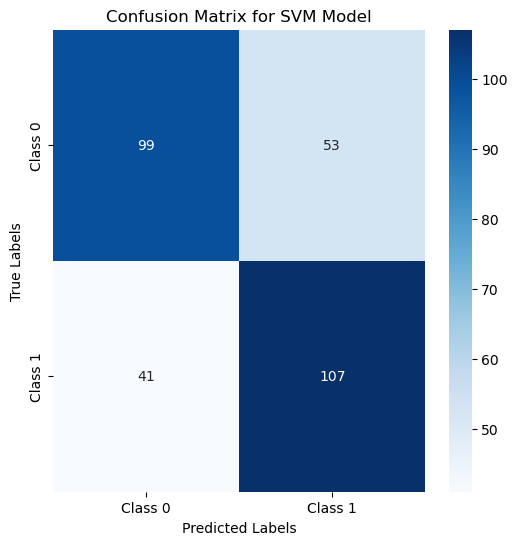

Accuracy on Test Set:  68.66666666666667 %
Confusion Matrix:
[[ 99  53]
 [ 41 107]]


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train the SVM model with the selected parameters on the whole normalized training set (I)
svm_model = SVC(C=0.5, gamma=0.05, kernel='rbf')
svm_model.fit(data_no_act_train_features_scaled, label_no_act_train.values.ravel())  # Fit model on scaled training set

# Predict the labels on the normalized test set
predictions = svm_model.predict(data_no_act_test_features_scaled)

# Calculate the accuracy on the test set
accuracy = accuracy_score(label_no_act_test, predictions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(label_no_act_test, predictions)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Output accuracy and confusion matrix
print("Accuracy on Test Set: ", accuracy * 100, "%")
print("Confusion Matrix:")
print(conf_matrix)

In [32]:

############################################ End of Task 2 ################################################


In [33]:

#********************************************* Task (3) for Physical Activity Group **************************


In [37]:
from sklearn.model_selection import train_test_split

##################################################### 80% Smaller training Set
##################################################### 20% validation Set 

X_train_II, X_val, y_train_II, y_val = train_test_split(
    data_act_train_features_scaled,      # Normalized training features set
    label_act_train,                     # labels for no activity training set
    test_size=0.2,                       # 20% validation set 
)
print("Training Set (II) size: ", X_train_II.shape[0], "samples")
print("Validation Set size: ", X_val.shape[0], "samples")

Training Set (II) size:  560 samples
Validation Set size:  140 samples


In [39]:
# Fit the scaler on the training set (II)
scaler = StandardScaler()

# Normalizing both small training set & validation set
X_train_II_scaled = scaler.fit_transform(X_train_II)
X_val_scaled = scaler.transform(X_val)

# Checking mean and standard deviation of the first feature for both training and validation sets
mean_train = X_train_II_scaled.mean(axis=0)
std_train = X_train_II_scaled.std(axis=0)

mean_val = X_val_scaled.mean(axis=0)
std_val = X_val_scaled.std(axis=0)

print("Training Set (II) - Mean:", mean_train)
print("Training Set (II) - Standard Deviation:", std_train)

print("Validation Set - Mean:", mean_val)
print("Validation Set - Standard Deviation:", std_val)


Training Set (II) - Mean: [-3.92543141e-17  6.34413157e-17 -1.89332677e-16 -1.55827732e-16
 -3.84612976e-17  9.75410229e-17]
Training Set (II) - Standard Deviation: [1. 1. 1. 1. 1. 1.]
Validation Set - Mean: [-0.01491693  0.06175116  0.10447226  0.26178589  0.10740652 -0.10226686]
Validation Set - Standard Deviation: [1.15077929 1.14245078 1.15071001 1.16563796 1.02159997 1.00330096]


In [41]:
# Define the different parameter combinations
parameters = [
    (1, 1),    # C = 1, gamma = 1
    (5, 0.5),  # C = 5, gamma = 0.5
    (0.5, 0.05) # C = 0.5, gamma = 0.05
]

# Train and evaluate the model for each set of parameters
for C_value, gamma_value in parameters:
    # Initialize the SVM classifier with RBF kernel
    model = SVC(C=C_value, gamma=gamma_value, kernel='rbf')

    # Flatten the labels to 1D arrays to avoid the warning
    y_train_II_flat = y_train_II.values.ravel()   # Flatten training labels
    y_val_flat = y_val.values.ravel()              # Flatten validation labels

    # Train the model on the training set (II)
    model.fit(X_train_II_scaled, y_train_II_flat)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_scaled)

    # Evaluate the model performance
    accuracy = accuracy_score(y_val_flat, y_val_pred)

    # Print out the performance
    print("Performance for C = ", C_value, "& Gamma Value = ", gamma_value)
    print("Accuracy: ", accuracy * 100)

Performance for C =  1 & Gamma Value =  1
Accuracy:  72.14285714285714
Performance for C =  5 & Gamma Value =  0.5
Accuracy:  72.85714285714285
Performance for C =  0.5 & Gamma Value =  0.05
Accuracy:  75.71428571428571


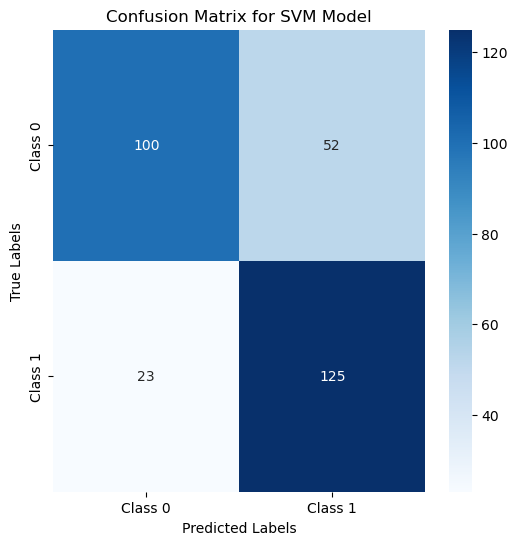

Accuracy on Test Set:  75.0 %
Confusion Matrix:
[[100  52]
 [ 23 125]]


In [43]:
# Train the SVM model with the selected parameters on the whole normalized training set (I)
svm_model = SVC(C=0.5, gamma=0.05, kernel='rbf')
svm_model.fit(data_act_train_features_scaled, label_act_train.values.ravel())  # Fit model on scaled training set

# Predict the labels on the normalized test set
predictions = svm_model.predict(data_act_test_features_scaled)

# Calculate the accuracy on the test set
accuracy = accuracy_score(label_act_test, predictions)

# Generate the confusion matrix
conf_matrix = confusion_matrix(label_act_test, predictions)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Output accuracy and confusion matrix
print("Accuracy on Test Set: ", accuracy * 100, "%")
print("Confusion Matrix:")
print(conf_matrix)

In [45]:

############################################ End of Task 3 ################################################


In [47]:

#********************************************* Task (4) Cross Model Check *********************************


In [59]:
########################################### Evaluation of No Activity Group 
########################################### Using Normalised Physical Activity Group Test Set
########################################### Checking the SVM Model on No Activity Group Dataset

########################################### Evaluate the SVM model trained on the NoActivity group
########################################## Use the normalized Physical Activity test set to test this model

# Train SVM model on the NoActivity training set
svm_model_no_act = SVC(C=0.5, gamma=0.05, kernel='rbf')  # Use best parameters found
svm_model_no_act.fit(data_no_act_train_features_scaled, label_no_act_train.values.ravel())

# Predict using the NoActivity-trained SVM model on the Physical Activity test set
predictions_on_act_test = svm_model_no_act.predict(data_act_test_features_scaled)

In [69]:
# Calculate accuracy
accuracy_on_act_test = accuracy_score(label_act_test, predictions_on_act_test)

# Compute confusion matrix
conf_matrix_on_act_test = confusion_matrix(label_act_test, predictions_on_act_test)

print("Accuracy of NoActivity Model on PhysActivity Test Set:", accuracy_on_act_test * 100, "%")
print("Confusion Matrix:")
print(conf_matrix_on_act_test)

Accuracy of NoActivity Model on PhysActivity Test Set: 73.66666666666667 %
Confusion Matrix:
[[102  50]
 [ 29 119]]


In [71]:
########################################### Evaluation of Physical Activity Group 
########################################### Using Normalised No Activity Group Test Set
########################################### Checking the SVM Model on Physical Activity Group Dataset

########################################### Evaluate the SVM model trained on the Physical Activity group
########################################## Use the normalized No Activity test set to test this model

# Train SVM model on the Physical Activity training set
svm_model_act = SVC(C=0.5, gamma=0.05, kernel='rbf')  # Use best parameters found
svm_model_act.fit(data_act_train_features_scaled, label_act_train.values.ravel())  # Ensure labels are 1D

# Predict using the PhysActivity-trained SVM model on the NoActivity test set
predictions_on_no_act_test = svm_model_act.predict(data_no_act_test_features_scaled)

In [75]:
# Calculate accuracy
accuracy_on_no_act_test = accuracy_score(label_no_act_test, predictions_on_no_act_test)

# Compute confusion matrix
conf_matrix_on_no_act_test = confusion_matrix(label_no_act_test, predictions_on_no_act_test)

print("Accuracy of PhysActivity Model on NoActivity Test Set:", accuracy_on_no_act_test*100, "%")
print("Confusion Matrix")
print(conf_matrix_on_no_act_test)

Accuracy of PhysActivity Model on NoActivity Test Set: 70.33333333333334 %
Confusion Matrix
[[ 92  60]
 [ 29 119]]


In [57]:

############################################ End of Task 4 ################################################
